In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label, find_objects




Exploratory Analysis

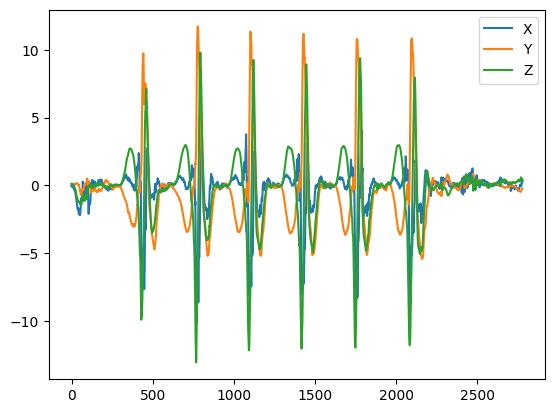

In [3]:
df = pd.read_csv("WristMotion.csv")
plt.plot(df['rotationRateX'], label='X')
plt.plot(df['rotationRateY'], label='Y')
plt.plot(df['rotationRateZ'], label='Z')
plt.legend()
plt.show()

Detecting Swing Segments from Total Magnitude

/var/folders/93/m7f8k_7s2n7_vmxxj8gv1kq80000gn/T/ipykernel_9465/3054347595.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg['label'] = 'backhand'
/var/folders/93/m7f8k_7s2n7_vmxxj8gv1kq80000gn/T/ipykernel_9465/3054347595.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg['label'] = 'backhand'
/var/folders/93/m7f8k_7s2n7_vmxxj8gv1kq80000gn/T/ipykernel_9465/3054347595.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

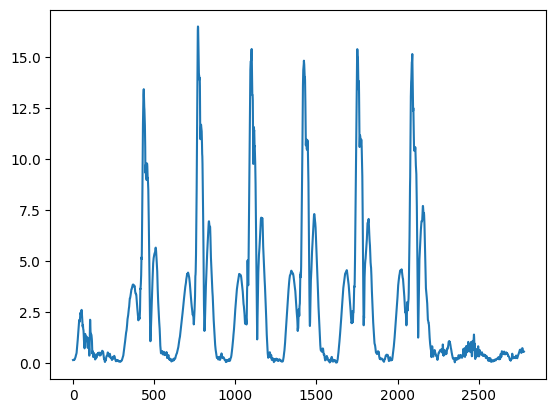

In [15]:
df['omega_mag'] = np.sqrt(df['rotationRateX']**2 + df['rotationRateY']**2 + df['rotationRateZ']**2)
plt.plot(df['omega_mag'])

threshold = 5.0
swing_indices = df['omega_mag'] > threshold

segments = []
for start, end in contiguous_regions(df['omega_mag'] > 2.0):
    seg = df.iloc[max(start-10, 0):min(end+10, len(df))]
    segments.append(seg)

for seg in segments:
    seg['label'] = 'backhand'

pd.concat(segments).to_csv("labeled_backhand.csv", index=False)


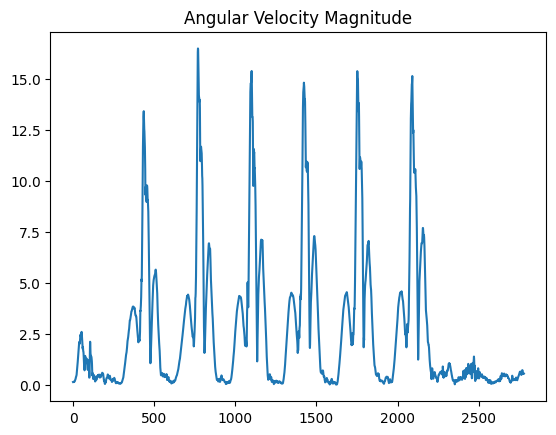

Saved swing 1: rows 28-68
Saved swing 2: rows 73-88
Saved swing 3: rows 93-97
Saved swing 4: rows 103-118
Saved swing 5: rows 321-538
Saved swing 6: rows 653-876
Saved swing 7: rows 986-1197
Saved swing 8: rows 1307-1524
Saved swing 9: rows 1642-1858
Saved swing 10: rows 1980-2201
Saved swing 11: rows 2315-2324
Saved swing 12: rows 2436-2437
Saved swing 13: rows 2453-2454
Saved swing 14: rows 2462-2464
Saved swing 15: rows 2468-2474


In [20]:


# Load your CSV
df = pd.read_csv("WristMotion.csv")

# Compute magnitude of angular velocity
df['omega_mag'] = np.sqrt(df['rotationRateX']**2 + df['rotationRateY']**2 + df['rotationRateZ']**2)

# Plot for visual reference
plt.plot(df['omega_mag'])
plt.title("Angular Velocity Magnitude")
plt.show()

# Detect swing regions above threshold
threshold = 1.0  # adjust as needed for your motion intensity
mask = df['omega_mag'] > threshold
labels, num_labels = label(mask)
regions = find_objects(labels)

# Save each swing as its own CSV
for i, region in enumerate(regions, start=1):
    start = region[0].start
    end = region[0].stop
    # Add small buffer before/after
    seg = df.iloc[max(start-10, 0):min(end+10, len(df))].copy()
    seg['label'] = 'backhand'
    seg.to_csv(f"backhand_{i}.csv", index=False)
    print(f"Saved swing {i}: rows {start}-{end}")

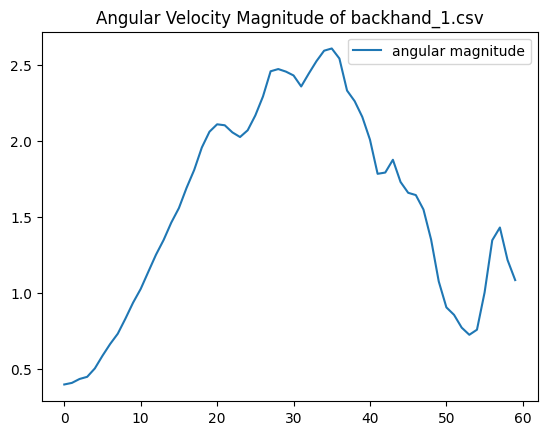

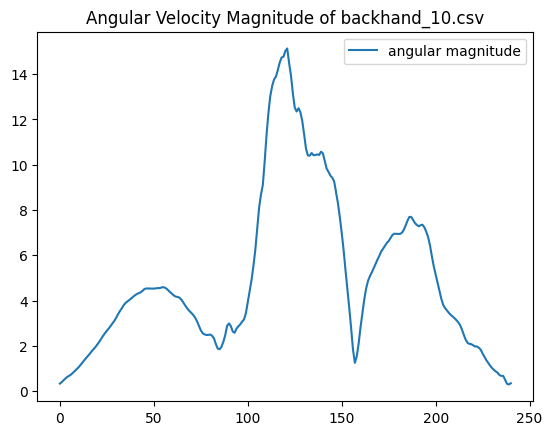

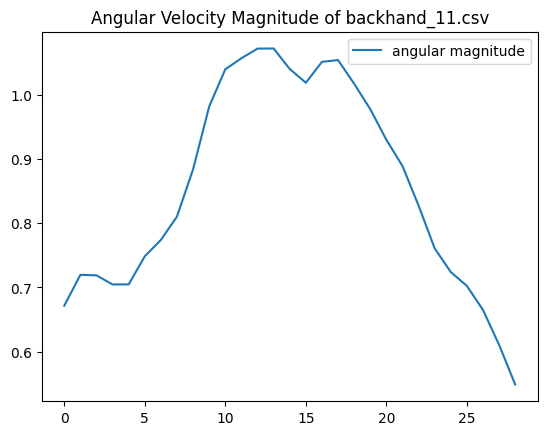

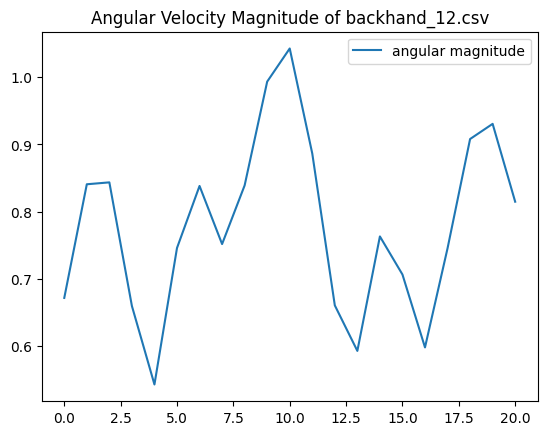

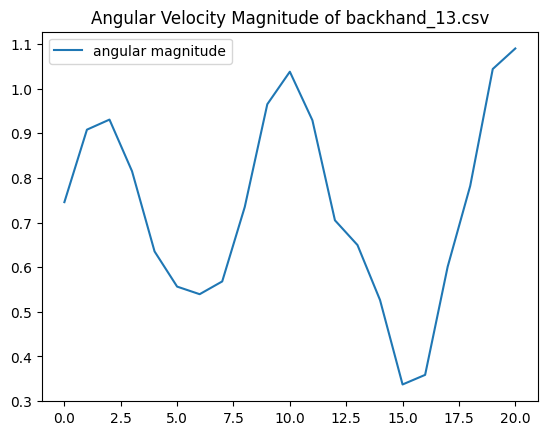

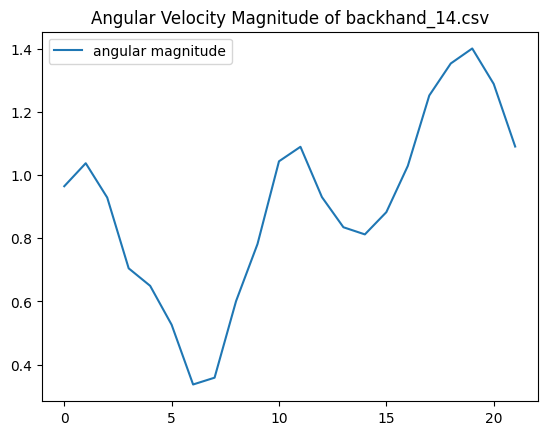

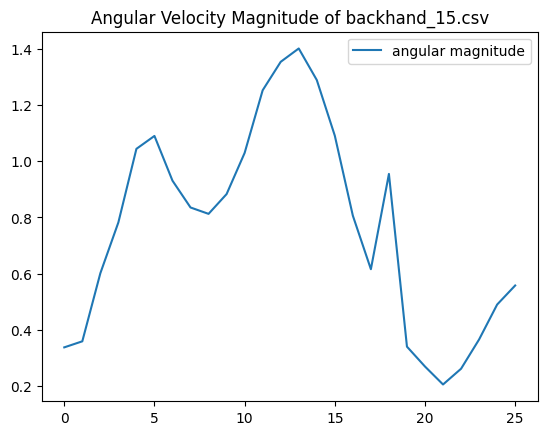

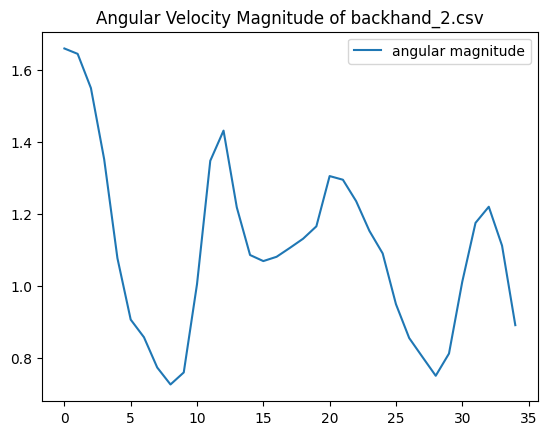

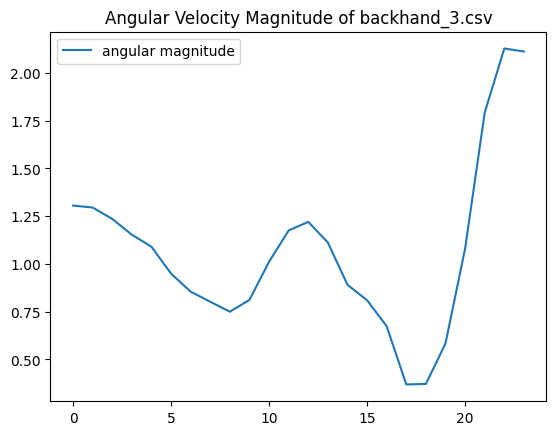

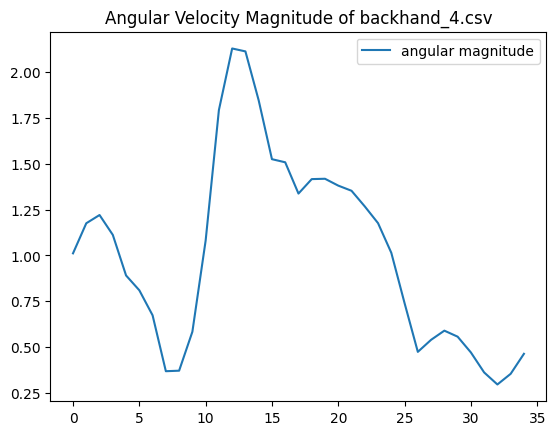

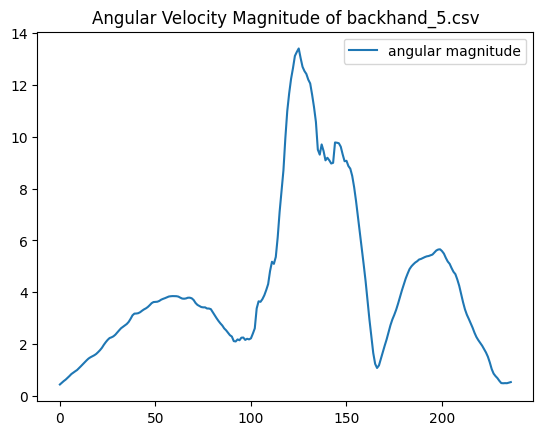

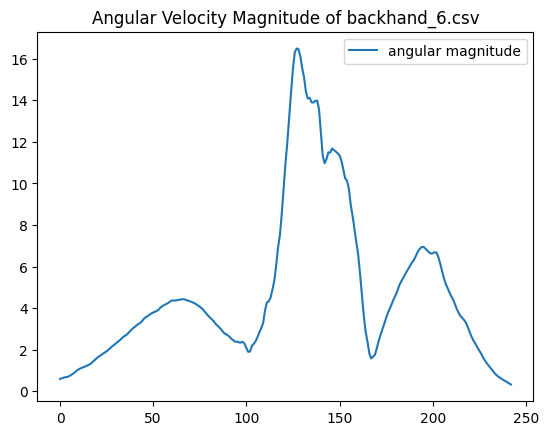

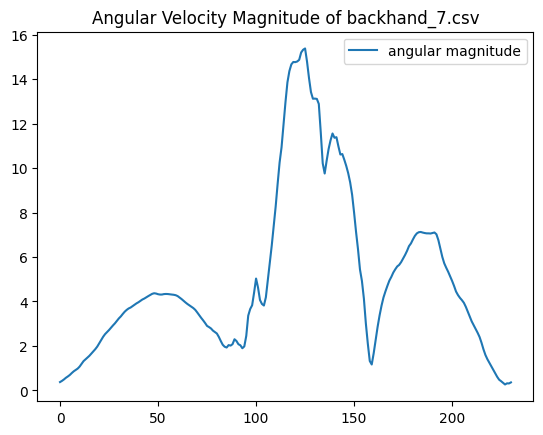

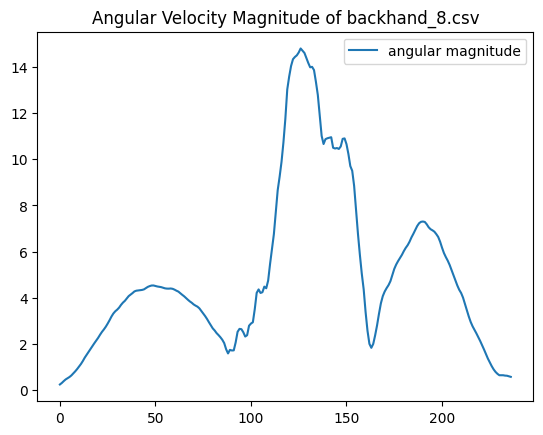

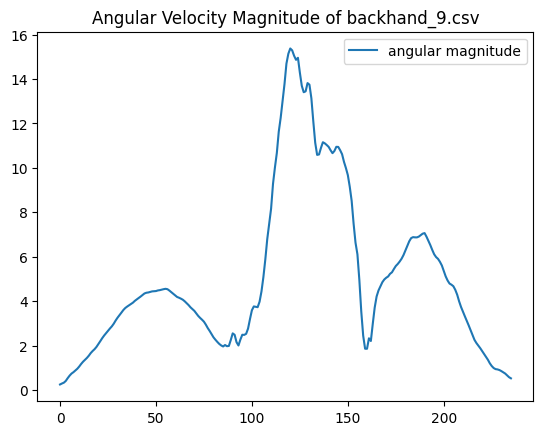

In [27]:
import os
import glob

backhand_files = sorted(glob.glob(os.path.join('backhands', 'backhand_*.csv')))
for fname in backhand_files:
    df = pd.read_csv(fname)
    plt.figure() 
    plt.plot(df['omega_mag'], label='angular magnitude')
    plt.title(f"Angular Velocity Magnitude of {os.path.basename(fname)}")
    plt.legend()
    plt.show()